<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

add pagination

In [ ]:
# articleapp/templates/articleapp/list.html
   {% include 'snippets/pagination.html' %}

# templates/snippets/pagination.html
    <div class="text-center my-4">
        {% if page_obj.has_previous %}
            <a href="?page={{ page_obj.previous_page_number}}"
            class="btn btn-secondary rounded-pill">
                {{ page_obj.previous_page_number }}
            </a>
        {% endif %}
        <a href="#"
        class="btn btn-dark rounded-pill">
            {{ page_obj.number }}
        </a>
        {% if page_obj.has_next %}
            <a href="?page={{ page_obj.next_page_number }}"
            class="btn btn-secondary rounded-pill">
                {{page_obj.next_page_number}}
            </a>
        {% endif %}
    </div>

터미널에  
python manage.py startapp commentapp

In [ ]:
# commentapp/urls.py 파일 생성
urlpatterns = [
] 

# gsweb/urls.py
    path('comments/',include('commentapp.urls')),


# commentapp/models.py
class Comment(models.Model):
    article = models.ForeignKey(Article, on_delete=models.SET_NULL,
                                related_name='comment', null=True)
    writer = models.ForeignKey(User, on_delete=models.SET_NULL,
                               related_name='comment', null=True)

    content = models.TextField(null=False)

    created_at = models.DateTimeField(auto_now_add=True)

# commentapp/forms.py 파일 생성
class CommentCreationForm(ModelForm):
    class Meta:
        model = Comment
        fields = ['content'] 

터미널에  
python manage.py makemigrations  
python manage.py migrate

###  add comment createview

In [ ]:
# commentapp/views.py
class CommentCreateView(CreateView):
    model = Comment
    form_class = CommentCreationForm
    template_name = 'commentapp/create.html'

    def get_success_url(self):
        return reverse('articleapp:detail', kwargs={'pk':self.object.article.pk}) 

# commentapp/urls.py
app_name = 'commentapp'

urlpatterns = [
    path('create/', CommentCreateView.as_view(), name='create'),
] 

In [ ]:
# commentapp/templates/commentapp/create.html
{% load bootstrap4 %}
    <div class="text-center mw-500 m-auto">
        <div class="m-5">
            <h4>Create Comment</h4>
        </div>
        <div>
            <form action="{% url 'commentapp:create' %}" method="post">
                {% csrf_token %}
                {% bootstrap_form form %}
                <div class="m-5">
                    <input type="submit" class="btn btn-dark rounded-pill px-5">
                </div>
            </form>
        </div>
    </div>


In [ ]:
# articleapp/views.py
class ArticleDetailView(DetailView, FormMixin):
    model = Article
    form_class = CommentCreationForm
    context_object_name = 'target_article'
    template_name = 'articleapp/detail.html'

In [ ]:
#  articleapp/templates/articleapp/detail.html
        <hr>

        <div class="text-center my-4">
            {% include 'commentapp/create.html'%}
        </div>
  

# 2. 알고리즘

In [ ]:
from collections import deque

n = int(input())
d_list = deque([i for i in range(1, n+1)])

# rotate_flag = False

while len(d_list) > 1:
    d_list.popleft()
    d_list.append(d_list.popleft())
    # d_list.rotate(-1)

    # if not rotate_flag:
    #     d_list.popleft()
    # else:
    #     d_list.append(d_list.popleft())

    # rotate_flag = not rotate_flag

print(d_list.popleft())

# test_list = deque([1,2,3,4,5])
# test_list.rotate(-1)
# print(test_list)

# test_list.rotate(-2)
# print(test_list)

### 재귀(Recursion)


# 3. 딥러닝

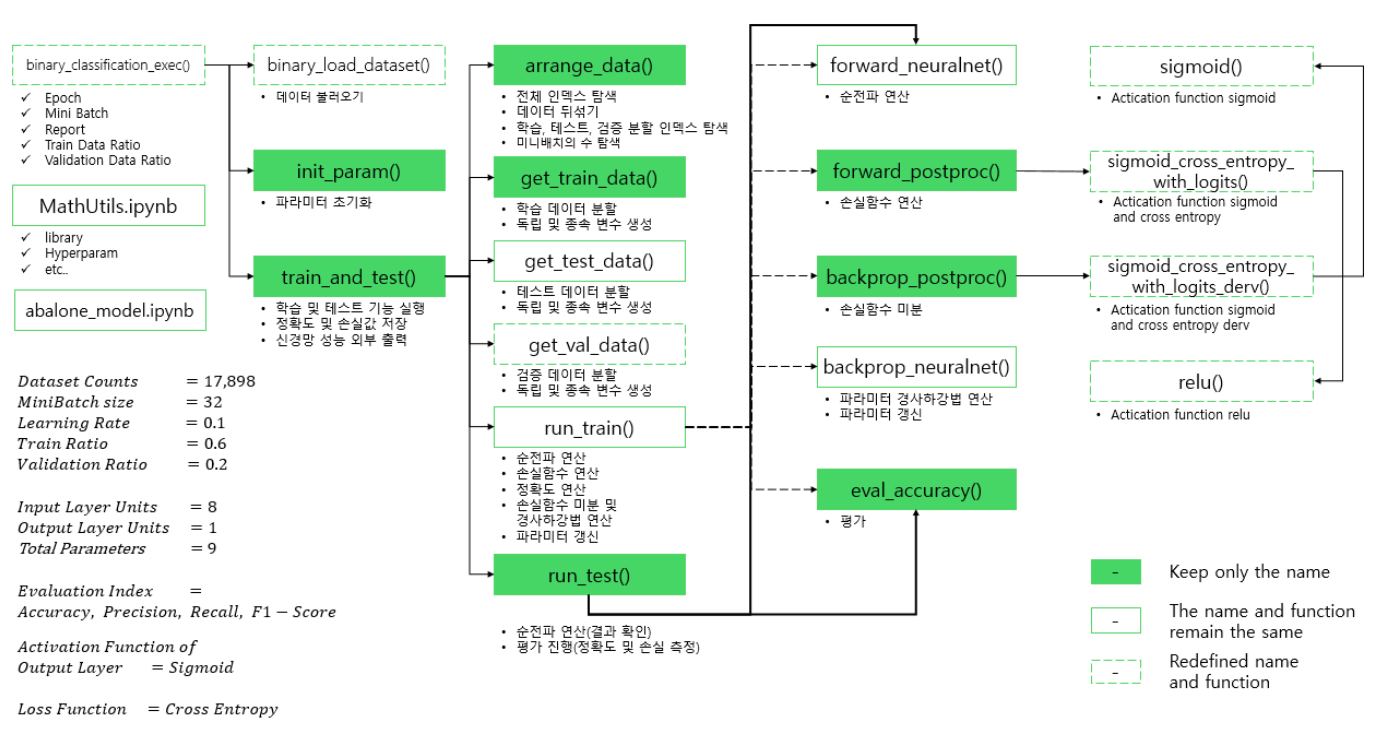

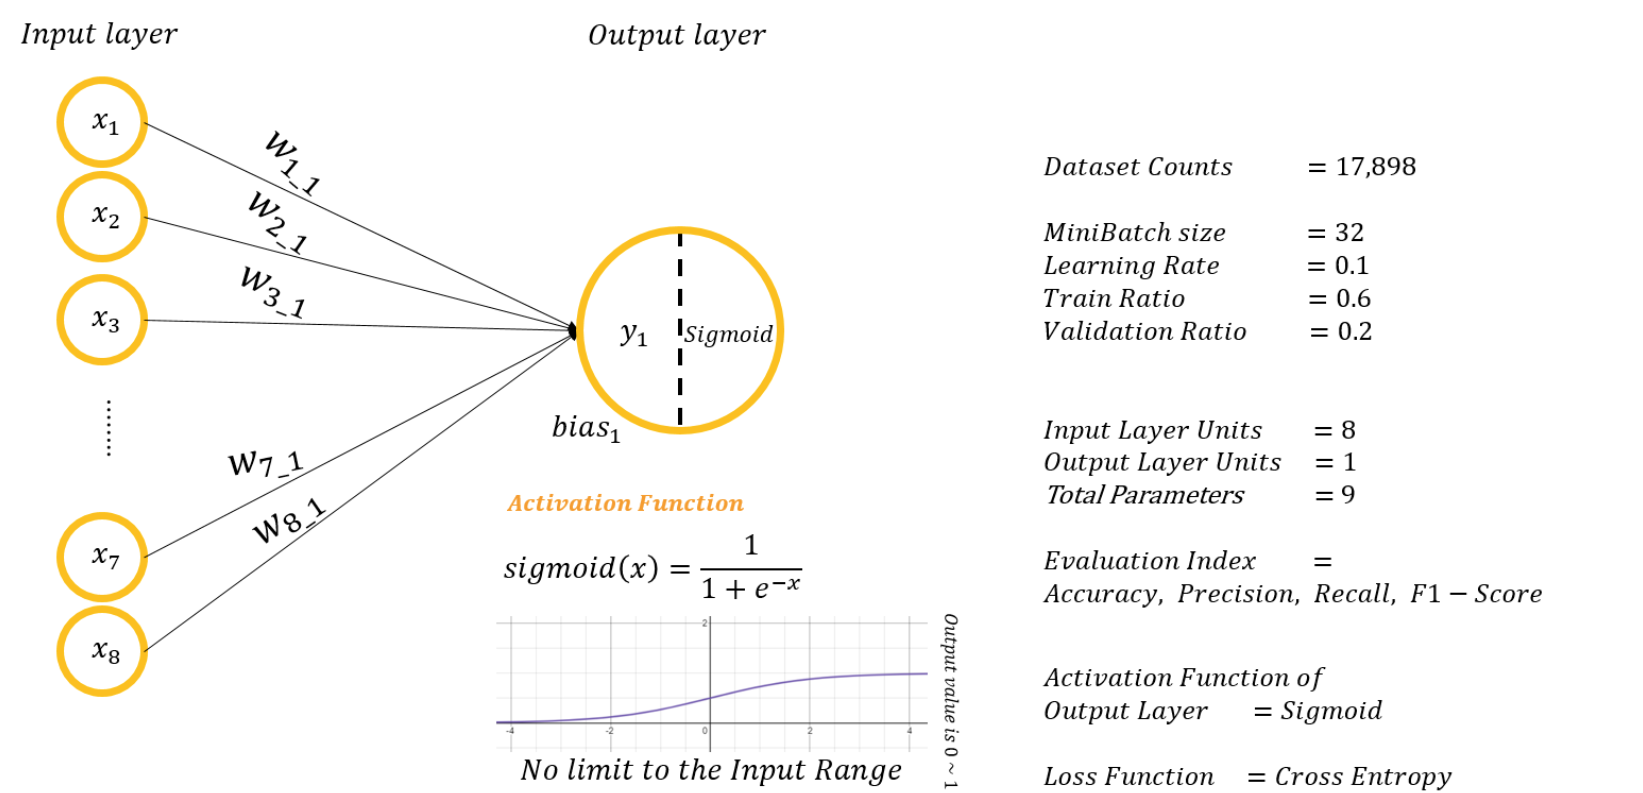

In [ ]:
import pandas as pd
df = pd.read_csv('/content/pulsar_stars_mini.csv')
df 

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,136.093750,51.691005,-0.045909,-0.271816,9.342809,38.096400,4.345438,18.673649,0
1,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
2,100.890625,51.890394,0.627487,-0.026498,3.883779,23.045267,6.953168,52.279440,0
3,116.203125,47.345862,0.211947,-0.022178,3.606187,18.944990,7.035645,59.231226,0
4,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
5,121.882812,53.042675,0.200521,-0.282219,2.116221,16.580876,8.947603,91.011762,0
6,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
7,135.859375,51.937272,0.065769,-0.366114,20.774247,52.772648,2.730909,6.607440,0
8,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
9,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1


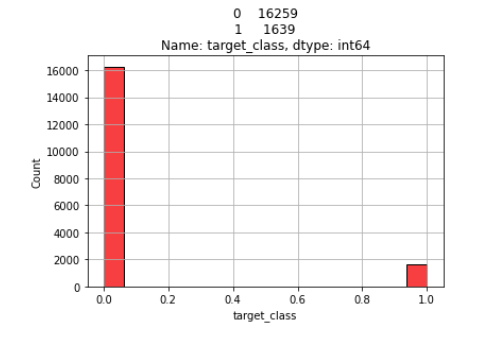

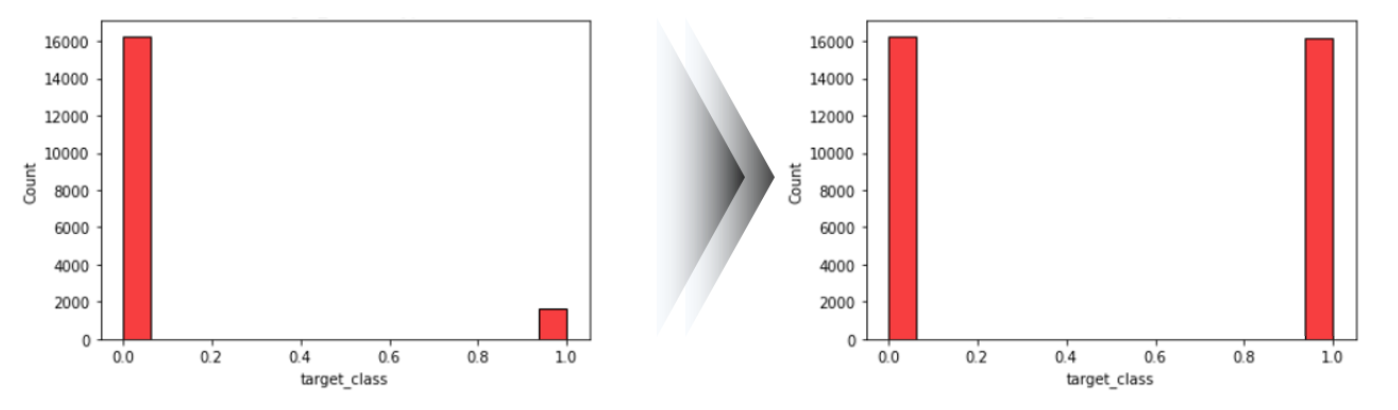

In [ ]:
%run /content/MathUtils.ipynb
%run /content/abalone_model.ipynb

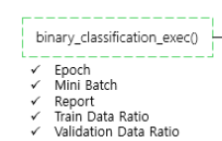

In [ ]:
def binary_classification_exec(epoch_count = 10, mb_size = 10, report =1 , train_ratio = 0.6, val_ratio = 0.2):
    binary_load_dataset()
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, 
                                                                           mb_size, 
                                                                           report, 
                                                                           train_ratio, 
                                                                           val_ratio)
    return train_metrics_mean_row, val_metrics_row, test_metrics

In [ ]:
def binary_load_dataset():
    with open('/content/pulsar_stars_mini.csv') as csvfile:
      csvreader = csv.reader(csvfile)
      next(csvreader)
      rows = []
      for row in csvreader:
        rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt =  8,1
    data = np.asarray(rows, dtype='float32')


In [ ]:
binary_load_dataset()
data.shape

(10, 9)

In [ ]:
data[:3]

array([[ 1.36093750e+02,  5.16910057e+01, -4.59089242e-02,
        -2.71816403e-01,  9.34280968e+00,  3.80964012e+01,
         4.34543800e+00,  1.86736488e+01,  0.00000000e+00],
       [ 9.93671875e+01,  4.15722008e+01,  1.54719698e+00,
         4.15410614e+00,  2.75551834e+01,  6.17190170e+01,
         2.20880795e+00,  3.66268015e+00,  1.00000000e+00],
       [ 1.00890625e+02,  5.18903961e+01,  6.27486527e-01,
        -2.64978018e-02,  3.88377929e+00,  2.30452671e+01,
         6.95316744e+00,  5.22794418e+01,  0.00000000e+00]], dtype=float32)

In [ ]:
def init_param():
    global weight, bias 

#    weight_initial = []
#    bias_initial   = []
    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])

    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))

#    weight_initial.append(weight)
#    bias_initial.append(bias)

#    return weight_initial, bias_initial

In [ ]:
init_param()

Initial Weight Value : 
[[ 0.02705708]
 [-0.07485666]
 [ 0.01970836]
 [-0.00660089]
 [-0.04349882]
 [-0.02739797]
 [ 0.02840795]
 [-0.01551892]]
Initial Bias Value : 
[0.]


In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):
    pass

In [ ]:
train_and_test(0,0,0,0,0)

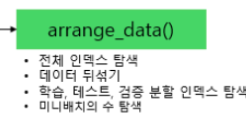

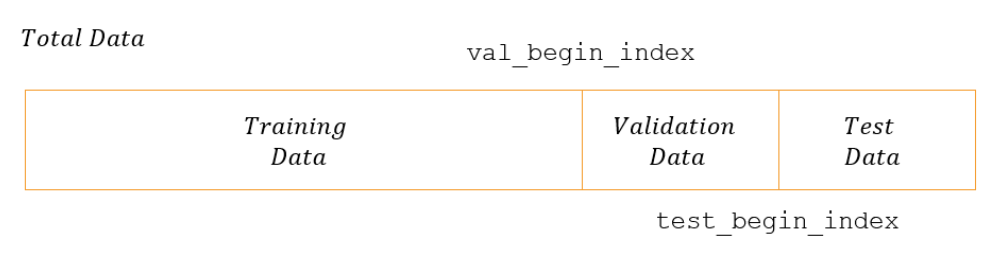

In [ ]:
def arrange_data(mb_size, train_ratio, val_ratio):
    
    global shuffle_map, test_begin_index

    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size
    
    val_begin_index  = mini_batch_step_count * mb_size

    test_begin_index = int(val_begin_index + (val_ratio * data.shape[0])) 

    return mini_batch_step_count

In [ ]:
arrange_data(mb_size = 1, train_ratio = 0.6, val_ratio = 0.2)

6

In [ ]:
print("mini_batch_step_count : ", mini_batch_step_count)
print("test_begin_index : ", test_begin_index)
print("val_begin_index  :", val_begin_index)

NameError: ignored

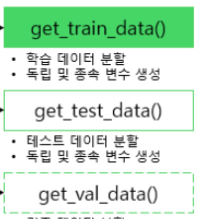

In [ ]:
def get_train_data(mb_size, n):

    from_idx = n * mb_size
    to_idx   = (n + 1) * mb_size

    train_data = data[shuffle_map[from_idx : to_idx]]

    return train_data[ : , : -output_cnt], train_data[ : , -output_cnt : ]

def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[ : , : -output_cnt], test_data[ : , -output_cnt : ]

def get_val_data():
    val_data = data[shuffle_map[val_begin_index : test_begin_index]]
    return val_data[ : , : -output_cnt], val_data[ : , -output_cnt : ]

In [ ]:
train_x, train_y = get_train_data(mb_size = 6, n = 0)
test_x, test_y   = get_test_data()
val_x, val_y     = get_val_data()

In [ ]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)
print(val_x.shape, val_y.shape)

(6, 8) (6, 1)
(2, 8) (2, 1)
(2, 8) (2, 1)


In [ ]:
def run_train(x, y):
    loss = 0
    accuracy = 100

    return loss, accuracy

def run_test(x, y):
    loss = 0
    accuracy = 100

    return loss, accuracy

In [ ]:
loss, acc = run_train(0,0)
print(loss, acc)

0 100


In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):
    mini_batch_step_count = arrange_data(mb_size, train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x, val_y   = get_val_data()

    val_loss_row, val_acc_row       = [], []
    losses_mean_row, accs_mean_row  = [], []

    # 에폭의 반복
    for epoch in range(epoch_count):

        losses = []
        accs   = []

        # 배치의 반복(학습)
        for n in range(mini_batch_step_count):

            train_x, train_y = get_train_data(mb_size, n)
            loss, acc        = run_train(train_x, train_y)

            losses.append(loss)
            accs.append(acc)

        # 에폭에 따른 검증 수행        
        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        val_acc_row.append(val_acc)

        if report > 0 and (epoch+1) % report == 0:

            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Val - Loss = {:.3f}, Accuracy = {:.3f}".\
                  format(epoch+1, np.mean(losses), np.mean(accs), val_loss, val_acc))
            

        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs)

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)
    
    #테스트 데이터의 테스트 결과 
    test_loss, test_acc = run_test(test_x, test_y)

    print("\n", "=" * 45, "Final Test", "=" * 45)
    print("\nTest Accuracy : {:.3f}".format(test_acc))
    print("\nTest Loss     : {:.3f}".format(test_loss))

    return losses_mean_row, accs_mean_row, val_loss_row, val_acc_row, test_loss, test_acc




# 출력 예시 1
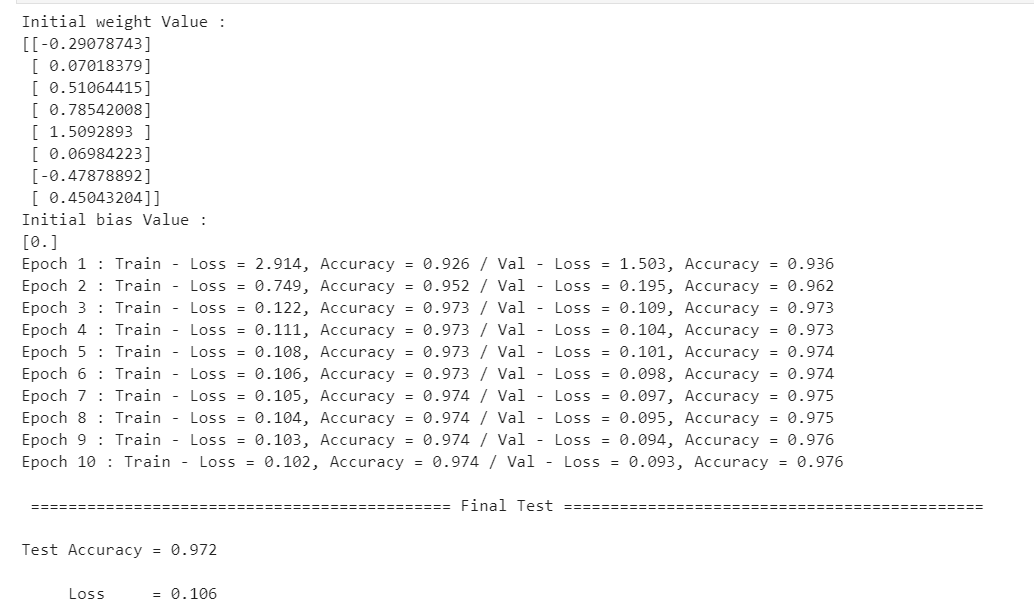

# 4. 머신러닝

In [ ]:
pip install mglearn

     |████████████████████████████████| 540 kB 31.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=efaad62021391d92350c0af02b3a528bae838bde24e3371b50476adfe1b7a3e3
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# df = pd.read_excel(drive_path + 'titanic.xls')
df = pd.read_excel('/content/titanic.xls')

##### 데이터 전처리

In [ ]:
# df.loc[ 행, 열(컬럼) ]
df.loc[ df['sex'] == 'male', 'sex'] 

In [ ]:
df['embarked'].value_counts()
pd.get_dummies(df['embarked'])
pd.get_dummies(df['sex'])['female']
df.loc[ df['sex'] == 'male', 'sex' ]
df.loc[ df['sex'] == 'female', 'sex' ]

df['fare'].mean()
df.groupby('pclass')['fare'].mean()[2]
df.loc[ pd.isnull( df['fare'] ), 'fare' ]

1225   NaN
Name: fare, dtype: float64

In [ ]:
# - embarked : 탑승장소별 컬럼 추가
# S=Southhampton, C=Cherbourg, Q=Queenstown
df['embarked_c'] = df['embarked'] == 'C'
df['embarked_s'] = df['embarked'] == 'S'
df['embarked_q'] = df['embarked'] == 'Q'

# 데이터에서 여성을 1로 남성을 0으로 설정
df.loc[ df['sex'] == 'male', 'sex' ] = 0
df.loc[ df['sex'] == 'female', 'sex' ] = 1

# 결측치 채움
# fare : 지불한 운임
mean_fare3 = df.groupby('pclass')['fare'].mean()[2]
df.loc[ pd.isnull( df['fare'] ), 'fare' ] = mean_fare3

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  embarked_c  1309 non-null   bool   
 15  embarked_s  1309 non-null   bool   
 16  embarked_q  1309 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(7)
memory usage: 147.1+ KB


In [ ]:
# Feature 선택
# X = 객실 클래스, 성별, 요금, 선착장 3개, 총 6요소
feature_names = ['pclass', 'sex', 'fare', 'embarked_c', 'embarked_q', 'embarked_s']
X = df[feature_names]
X.shape

(1309, 6)

In [ ]:
# 정답셋 준비
# y = "survived"
y = df['survived']
y.shape

(1309,)

#### Decision Tree 실습 05

결정트리로 타이타닉 생존자 예측

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=13)

In [ ]:
# 결정트리 적용
from sklearn.tree import DecisionTreeClassifier
model

# 훈련 점수, 테스트 점수
model.score  

In [ ]:
# 트리 구조 시각화하기
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz


In [ ]:
# 정확도 예측하기 (accuracy_score)
from sklearn.metrics import accuracy_score


In [ ]:
# 실제 데이터를 넣어서 예측하기
# pclass, sex, age, sibsp, parch, fare
# dicaprio = [3., 0., 19., 0., 0., 5.]
# winslet  = [1., 1., 17., 1., 2., 100.]
dicaprio = [3., 0., 7., True, False, False]
winslet  = [1., 1., 30., False, False, True]


## 결정 트리 회귀

- 분류 결정 트리와 비슷
- 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측
- 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음
 - (다른 모든 트리기반 회귀 모델도 동일)

[DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

```
DecisionTreeRegressor(criterion, splitter, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, presort, ccp_alpha)
```
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- <font  color=yellow> max_depth : 트리의 최대 깊이 <br>
(값이 클수록 모델의 복잡도가 올라간다.) </font>
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- <font  color=yellow> min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1) </font>
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- <font  color=yellow> max_leaf_nodes : 리프 노드의 최대수 </font>
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- presort : 데이터 정렬 필요 여부 (버전 0.22부터 사용되지 않음)
- ccp_alpha : 최소 비용 복잡성 가지 치기(Minimal Cost-Complexity Pruning) 복잡성 매개변수, 음이아닌 float (버전 0.22의 새로운 기능)


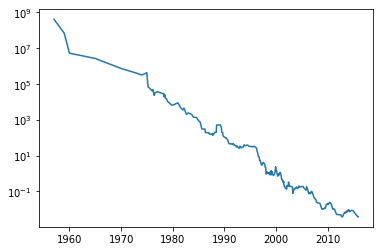

In [ ]:
import numpy as np
import pandas as pd
import os
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
type(ram_prices)
ram_prices.head()

# 로그 스케일로 그린 램 가격 동향
# plt.plot(ram_prices.date, ram_prices.price)
# plt.yscale('log')
plt.semilogy(ram_prices.date, ram_prices.price)

- y 축은 로그 스케일
- 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기 쉬움

In [ ]:
d_train.date[:, np.newaxis].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(202, 1)

In [ ]:
# 결정트리 회귀 적용
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듬
d_train = ram_prices[ ram_prices.date < 2000 ]
d_test = ram_prices[ ram_prices.date >= 2000 ]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = d_train.date[:, np.newaxis]

# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 변경.
y_train = np.log(d_train.price)

# 모델 선택 및 학습
model_tree = DecisionTreeRegressor().fit(X_train, y_train)
model_lr = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_test = ram_prices.date[:, np.newaxis]

pred_tree = model_tree.predict(X_test)
pred_lr = model_lr.predict(X_test)

# 예측한 값의 로그 스케일 되돌림
pred_tree = np.exp(pred_tree)
pred_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


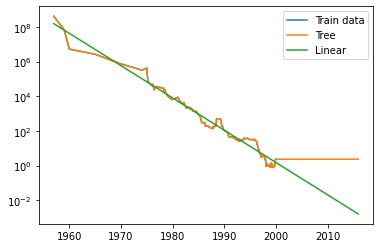

In [ ]:
# 결과 시각화
plt.semilogy(d_train.date, d_train.price, label='Train data')
plt.semilogy(d_test.date, d_test.price, label='Test data')

plt.semilogy(ram_prices.date, pred_tree, label='Tree')
plt.semilogy(ram_prices.date, pred_lr, label='Linear')
plt.legend()

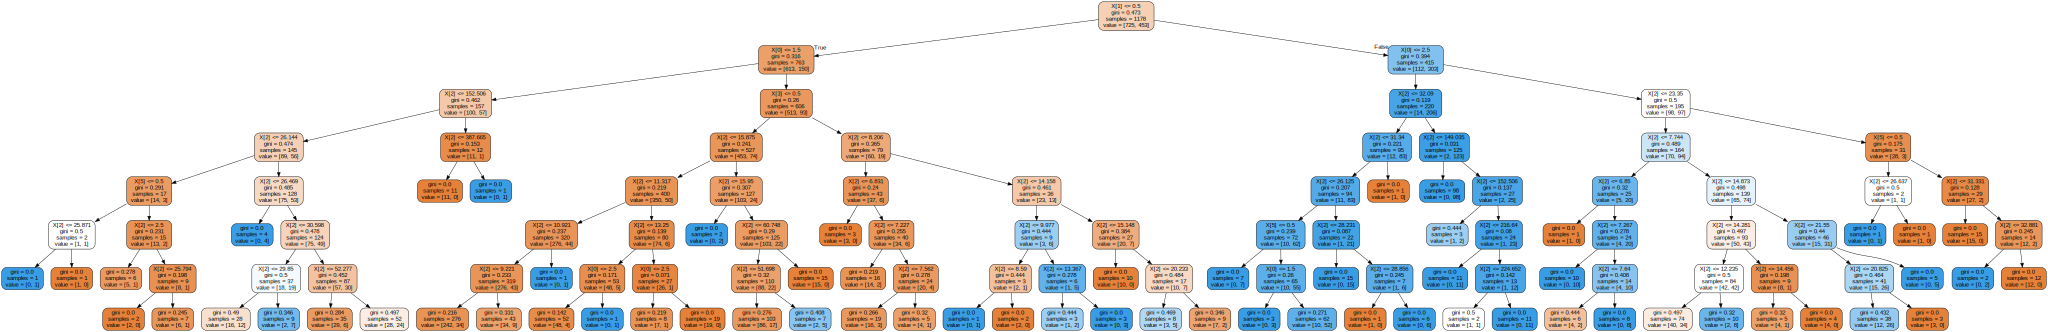

In [ ]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(model_tree, out_file=None,
                filled=True, rounded=True, impurity=True)
display( graphviz.Source(dot_graph) )

- 선형 모델은 우리가 아는 대로 직선으로 데이터를 근사
- 이 직선은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 매끈하게 근사하여 테스트 데이터(2000년 이후)를 꽤 정확히 예측
- 반면에 트리 모델은 훈련 데이터를 완벽하게 예측
- 트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문
- 그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는 게 전부
- 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음


-  사전 가지치기 방법 중 max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분

- 다른 알고리즘들보다 나은 점 : 만들어진 모델을 쉽게 시각화할 수 있음, 데이터의 스케일에 구애받지 않음 (스케일링이 필요 없음)

- 주요 단점 : 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않음